# 1. Предсказание цены на недвижимость

In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

%config InlineBackend.figure_format = 'retina'
from pylab import rcParams
rcParams['figure.figsize'] = (9, 6)

In [2]:
import numpy as np
import pandas as pd

### Данные

в sklearn есть модуль, содержащий набор классических датасетов, воспользуемся им:

In [3]:
from sklearn.datasets import load_boston

print(load_boston())

In [4]:
print(load_boston())

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

In [5]:
load_boston().keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [6]:
load_boston()['DESCR']

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [7]:
X, y = load_boston(return_X_y = True)

In [8]:
X

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [9]:
y.shape

(506,)

In [10]:
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

### Задание.

1. Показать Dataframe в привычном виде.

In [11]:
load_boston()['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [12]:
d = pd.DataFrame(X, columns = load_boston()['feature_names'])
d['MEDV'] = y
d

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


### Задание. Формирование выборок

разделим данные на 2 части, обучающую и тренировочную выборки:
1. фиксируем размер обучающей выборки
2. выделяем подмассивы данных из X, y

In [13]:
"""
создать X_train, X_test, y_train, y_test
"""

l = len(d.index)
train_len = int(l * 0.8)

d = d.sample(frac=1).reset_index(drop=True)

X_train = d[0:train_len]
X_test = d[train_len:]

y_train = X_train['MEDV']
y_test = X_test['MEDV']

X_train = X_train.drop(['MEDV'], axis=1)
X_test = X_test.drop(['MEDV'], axis=1)


In [14]:
X_train.shape

(404, 13)

## Продолжение теории

### Предсказания по тестовой выборке

1. Сделать предсказание

In [15]:
from sklearn.linear_model import LinearRegression


In [16]:
model = LinearRegression()
model.fit(X_train, y_train)
a = model.predict(X_test)

In [17]:
a

array([13.31728676, 15.51613598, 21.71340296, 44.79960565, 20.63015236,
       18.86665746, 19.16855614, 32.75081026, 20.39997154,  6.5149104 ,
       31.60167309, 19.28016933, 34.85064634, 30.77142673, 22.98779921,
       20.04258626, 16.74935062, 33.63925745, 24.31038906, 24.33953011,
       36.58736342, 16.6850559 , 17.33025958, 24.28178685, 26.88047877,
       31.11581115, 32.96168263, 23.90996127, 14.80451167, 25.49858824,
       41.2624808 , 16.23671038, 37.14683419, 17.67189509, 27.29593989,
       30.5482366 , 27.31252989, 18.78735714, 17.25791708, 27.76518731,
       16.18647188, 30.32343582,  5.94700721, 16.47452757, 18.09909492,
       28.32043897, 20.26912905, 27.72564444, 30.92230856, 40.13964671,
       14.30801815, 15.09447557, 19.70732732, 31.17089558, 33.12740924,
       43.1664548 , 36.06655612, 17.54516073, 40.99452987, 13.68438811,
       20.44008291, 30.71114653,  5.65923802, 30.54586407, 31.09343548,
       19.85468682, 21.78338401, 23.0661688 , 22.63361841, 21.61

In [18]:
y_test

404    13.9
405    16.6
406    23.3
407    50.0
408    20.0
       ... 
501    21.4
502    20.4
503    24.1
504    25.0
505    31.2
Name: MEDV, Length: 102, dtype: float64

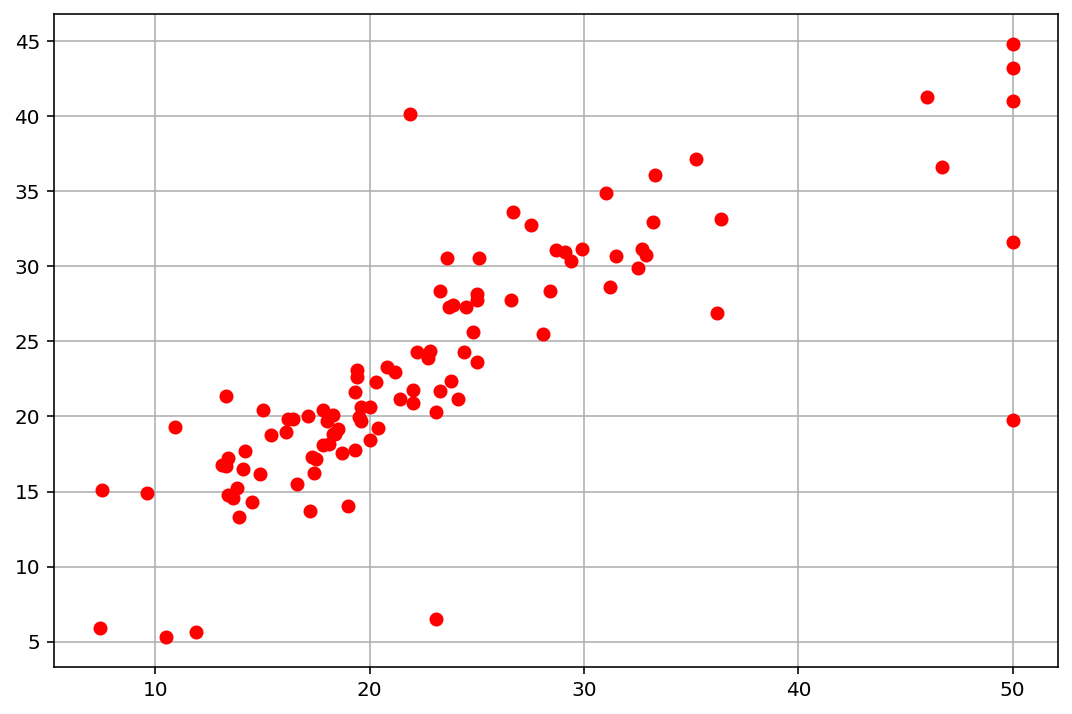

In [19]:
plt.plot(y_test, a, 'ro')
plt.grid()

### Оценка

1. сделать визуальное сравнение через matplotlib и seaborn c линией тренда
2. построить гистограмму распределения ошибки
3. найти коэффициент корреляции между предсказанными и реальными значениями и построить heatmap с анотацией


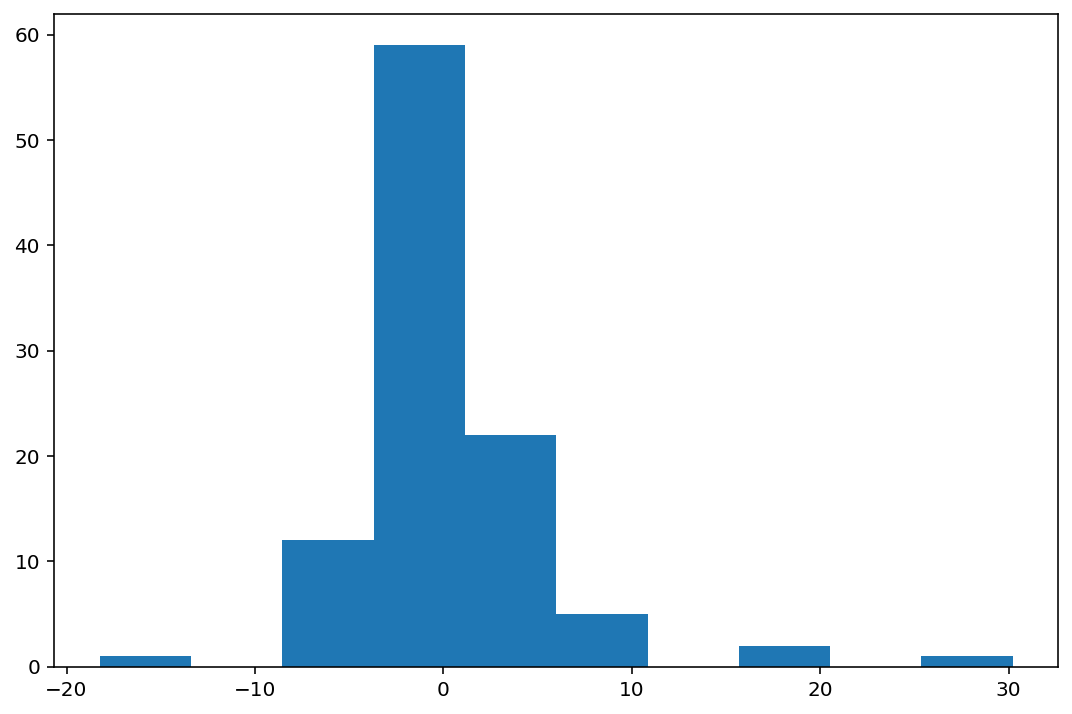

In [20]:
plt.hist(y_test - a)
plt.show()

In [21]:
corr = pd.DataFrame((a, y_test)).T.corr()
corr

,0,1
0,1.000000,0.813232
1,0.813232,1.000000


<AxesSubplot:>

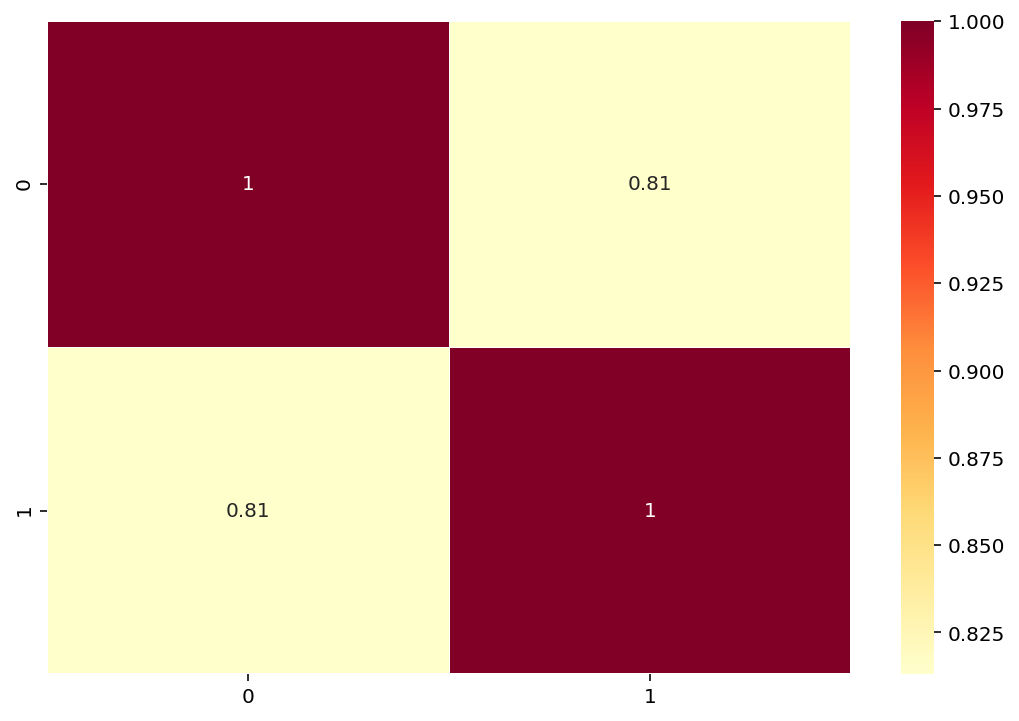

In [22]:
sns.heatmap(corr, cmap="YlOrRd", linewidths=0.1, annot=True)

### MSE

MSE - среднеквардратичная ошибка, т.е. среднее значение суммы квадратов ошибок

1. Посчитать среденеквадратическую ошибку MSE

In [23]:
np.mean((a - y_test) ** 2)

30.47791578401838

In [24]:
np.sqrt(np.mean((a - y_test) ** 2))

5.520680735563177